# <a id='toc1_'></a>[Youtube Sentiment Analysis: Jake Paul vs. Mike Tyson Trailer](#toc0_)


## <a id='toc1_4_'></a>[Background](#toc0_)

### <a id='toc1_4_1_'></a>[Who is Jake Paul?](#toc0_)

[Jake Joseph Paul](https://en.wikipedia.org/wiki/Jake_Paul) (born January 17, 1997) is an American professional boxer, actor and YouTuber. He began his career posting videos on Vine in September 2013 and had amassed 5.3 million followers and 2 billion views before the app discontinued. As an actor, he played Dirk Mann on the Disney Channel series *Bizaardvark* (2016–2018). Paul launched his YouTube channel in May 2014, and has ranked on the Forbes list as one of the highest paid YouTube creators in 2017, 2018, 2021, and 2023. He also ranked on the 2022 Forbes list of the world's highest paid athletes.

His boxing career began in August 2018 with a white-collar boxing match against Deji Olatunji, in which he won via technical knockout. His professional boxing debut was against AnEsonGib in January 2020. He later faced and defeated former basketball player Nate Robinson, former MMA fighters Ben Askren, Tyron Woodley (twice), Anderson Silva and Nate Diaz, and professional boxers Andre August and Ryan Bourland. In February 2023, Paul lost to Tommy Fury via split decision in his first fight with an active professional boxer. In 2021, Paul founded "Most Valuable Promotions" a boxing promotion alongside his adviser Nakisa Bidarian, and founded Anti Fund, a venture capital firm with Geoffrey Woo.

### <a id='toc1_4_2_'></a>[Who is Mike Tyson?](#toc0_)

[Michael Gerard Tyson](https://en.wikipedia.org/wiki/Mike_Tyson) (born June 30, 1966) is an American professional boxer who competed from 1985 to 2005, and is scheduled to compete once again in 2024. Nicknamed "Iron Mike" and "Kid Dynamite" in his early career, and later known as "the Baddest Man on the Planet", Tyson is regarded as one of the greatest heavyweight boxers of all time. He reigned as the undisputed world heavyweight champion from 1987 to 1990. Tyson won his first 19 professional fights by knockout, 12 of them in the first round. Claiming his first belt at 20 years, 4 months, and 22 days old, Tyson holds the record as the youngest boxer ever to win a heavyweight title. He was the first heavyweight boxer to simultaneously hold the WBA, WBC and IBF titles, as well as the only heavyweight to unify them in succession. The following year, Tyson became the lineal champion when he knocked out Michael Spinks in 91 seconds of the first round. In 1990, Tyson was knocked out by underdog Buster Douglas in one of the biggest upsets in boxing history.


### <a id='toc1_4_3_'></a>[What is Sentiment Analysis?](#toc0_)

[Sentiment analysis](https://www.ibm.com/topics/sentiment-analysis?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Youtube+Sentiment+Analysis%3A+Jake+Paul+vs.+Mike+Tyson+Trailer-v1), or opinion mining, is the process of analyzing large volumes of text to determine whether it expresses a positive sentiment, a negative sentiment or a neutral sentiment.

Companies now have access to more data about their customers than ever before, presenting both an opportunity and a challenge: analyzing the vast amounts of textual data available and extracting meaningful insights to guide their business decisions.

From emails and tweets to online survey responses, chats with customer service representatives and reviews, the sources available to gauge customer sentiment are seemingly endless. Sentiment analysis systems help companies better understand their customers, deliver stronger customer experiences and improve their brand reputation.


## <a id='toc1_5_'></a>[Setup](#toc0_)

For this lab, we will be using the following libraries:


- `pandas` for managing the data.
- `numpy` for mathematical operations.
- `seaborn` for visualizing the data.
- `matplotlib` for visualizing the data.
- `nltk` for text preprocessing tasks
- `wordcloud` for generating word clouds.


### <a id='toc1_5_1_'></a>[Installing required libraries](#toc0_)


In [32]:
%pip install nltk
%pip install wordcloud
%pip install pandas
%pip install numpy
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------- 20.5/299.9 kB 93.9 kB/s eta 0:00:03
   ------ -------------------------------- 51.2/299.9 kB 238.1 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 234.9 kB/s eta 0:00:02
   ------------ ------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### <a id='toc1_5_2_'></a>[Importing Required Libraries](#toc0_)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

def warn(*args, **kwargs):
    pass
    
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## <a id='toc1_6_'></a>[Load the dataset](#toc0_)

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-H0BcPr512mhbTDDfkcTJA/comments-with-emotions.csv')

In [7]:
df

,comment,like_count,published_at,author,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,2024-10-26T01:19:27Z,@thesecond4113,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,2024-10-26T01:09:55Z,@bluesslider76,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,2024-10-26T00:19:29Z,@thechaosmaster9934,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,2024-10-26T00:16:10Z,@tokesenari,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,2024-10-25T23:53:49Z,@HumbleAstronaut,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,WTF,0,2024-10-15T13:01:03Z,@ischubbypinkcheekscute8408,Negative,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1152,Is this real or a joke?,42,2024-10-15T13:01:00Z,@moondancecoffee,Positive,"{'positive': 1, 'trust': 1, 'negative': 1}",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1153,Bruh,0,2024-10-15T13:00:56Z,@H20_BadOnMyEnd,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1154,First comment 😂,0,2024-10-15T13:00:37Z,@josmith1184,Positive,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## <a id='toc1_7_'></a>[File Structure and Column Descriptions](#toc0_)

- **comment**: Text content of the comment posted on YouTube.
- **like_count**: Number of likes each comment received, indicating engagement.
- **sentiment**: Sentiment classification of each comment (Positive, Neutral, or Negative).
- **emotions**: Emotions detected in each comment, including categories like Joy, Anger, Trust, Fear, etc.
- **anger**: Numeric value representing the intensity of Anger detected in the comment.
- **fear**: Numeric value representing the intensity of Fear detected.
- **negative**: Numeric value for the overall Negative emotion detected in the comment.
- **positive**: Numeric value for the overall Positive emotion detected.
- **trust**: Numeric value representing the intensity of Trust detected.
- **anticipation**: Numeric value for the intensity of Anticipation detected in the comment.
- **joy**: Numeric value representing the intensity of Joy detected.
- **surprise**: Numeric value representing the intensity of Surprise detected.
- **sadness**: Numeric value representing the intensity of Sadness detected.
- **disgust**: Numeric value representing the intensity of Disgust detected.



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comment         1156 non-null   object 
 1   like_count      1156 non-null   int64  
 2   published_at    1156 non-null   object 
 3   author          1156 non-null   object 
 4   sentiment       1156 non-null   object 
 5   emotions        1156 non-null   object 
 6   anger           1156 non-null   float64
 7   fear            1156 non-null   float64
 8   negative        1156 non-null   float64
 9   positive        1156 non-null   float64
 10  trust           1156 non-null   float64
 11  anticipation    1156 non-null   float64
 12  joy             1156 non-null   float64
 13  surprise        1156 non-null   float64
 14  sadness         1156 non-null   float64
 15  disgust         1156 non-null   float64
 16  positive_count  1156 non-null   int64  
dtypes: float64(10), int64(2), object(

## <a id='toc1_8_'></a>[Data Preprocessing](#toc0_)
- Remove any duplicates
- Remove any missing values
- Remove columns that are not needed: `published_at`, `author`


In [11]:
# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Remove rows with missing values
df = df.dropna()

# Step 3: Drop unnecessary columns
df = df.drop(columns=['published_at', 'author'])

df

,comment,like_count,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,WTF,0,Negative,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1152,Is this real or a joke?,42,Positive,"{'positive': 1, 'trust': 1, 'negative': 1}",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1153,Bruh,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1154,First comment 😂,0,Positive,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## <a id='toc1_9_'></a>[Data Processing](#toc0_)

### <a id='toc1_9_1_'></a>[Word Cloud for `comment` Column](#toc0_)

#### <a id='toc1_9_1_1_'></a>[What is a Word Cloud?](#toc0_)

A word cloud is a visual representation of text data. It displays a list of words, the importance of each being shown with font size or color. This format is useful for quickly perceiving the most prominent terms.


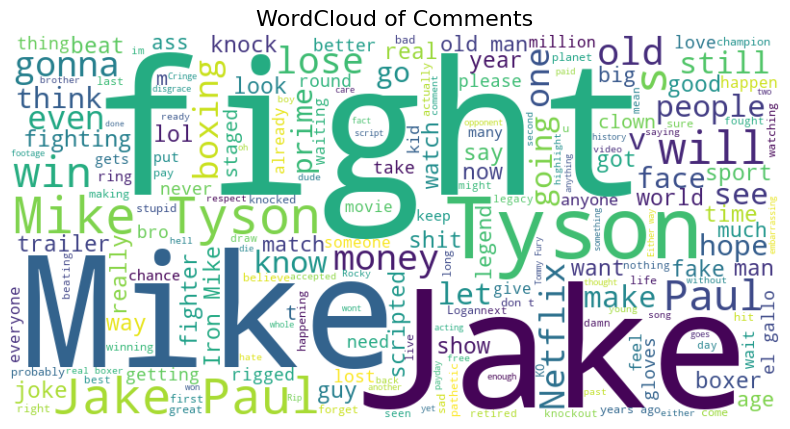

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for 'comment' column
text = " ".join(comment for comment in df['comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Comments", fontsize=16)
plt.show()

### <a id='toc1_9_2_'></a>[Distribution of Sentiments](#toc0_)

#### <a id='toc1_9_2_1_'></a>[What is a Distribution Plot?](#toc0_)

A distribution plot is a form of data visualization that shows the distribution of a dataset. 


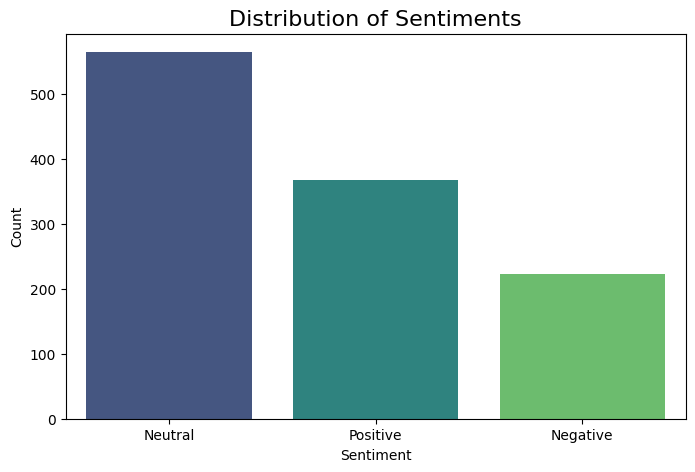

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


### <a id='toc1_9_3_'></a>[Correlation Heatmap for Emotions](#toc0_)

#### <a id='toc1_9_3_1_'></a>[What is a Correlation Heatmap?](#toc0_)

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. It is very important in feature selection and helps us to understand the relationships between different features in a dataset.


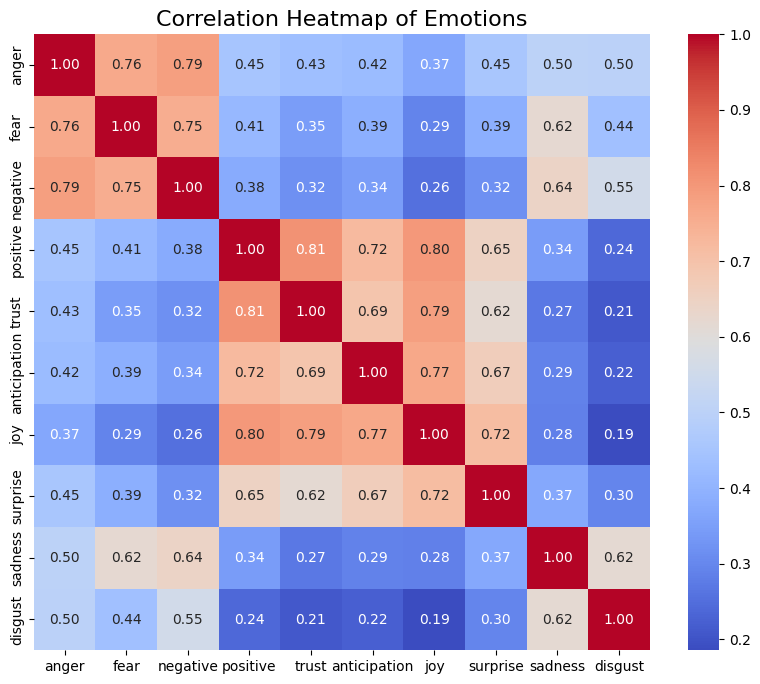

In [17]:
import seaborn as sns

emotion_columns = ['anger', 'fear', 'negative', 'positive', 'trust',
                   'anticipation', 'joy', 'surprise', 'sadness', 'disgust']
correlation_matrix = df[emotion_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Emotions", fontsize=16)
plt.show()


**Insights from the Heatmap**:

•	The **diagonal values are all 1**, as each variable is perfectly correlated with itself.

•	**Strong correlations** (close to 1):

•	anger and negative (0.79): Strong positive correlation between anger and negativity.

•	positive and trust (0.81): Strong relationship between positivity and trust.

•	joy and positive (0.80): High positivity is often associated with joy.

•	**Weaker correlations** (close to 0):

•	sadness and joy (0.28): Indicates that sadness and joy are only weakly related.

•	disgust and joy (0.19): Low correlation, showing little interaction between these emotions.


### <a id='toc1_9_4_'></a>[Barplot of Top Emotions](#toc0_)

#### <a id='toc1_9_4_1_'></a>[What is a Barplot?](#toc0_)

A barplot is a way of representing data where the length of the bars represents the magnitude of the variable. It is useful for comparing different categories of data.


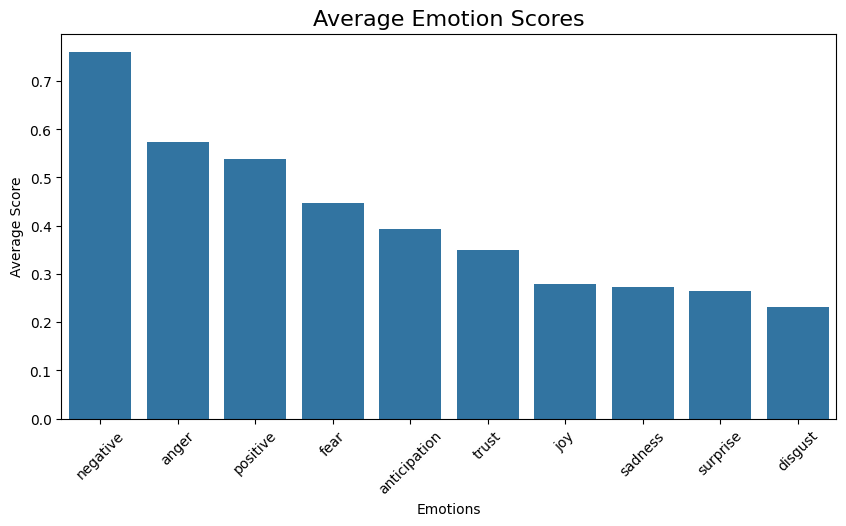

In [19]:
# Barplot of top emotions
mean_emotions = df[emotion_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_emotions.index, y=mean_emotions.values)
plt.title("Average Emotion Scores", fontsize=16)
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


### <a id='toc1_9_5_'></a>[Top 10 most common words in comments](#toc0_)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


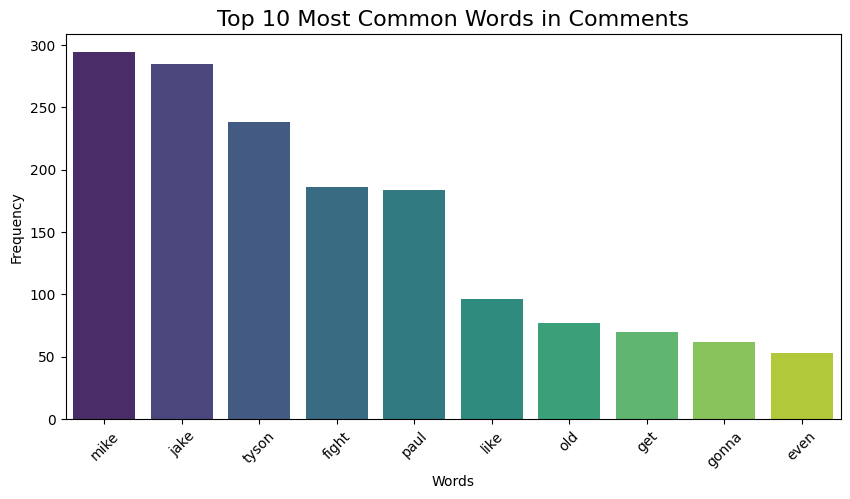

In [21]:
# Top 10 most common words in comments
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = " ".join(df['comment'].astype(str)).split()
filtered_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Common Words in Comments", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### <a id='toc1_9_6_'></a>[Pairplot for selected emotion columns](#toc0_)

#### <a id='toc1_9_6_1_'></a>[What is a Pairplot?](#toc0_)

A pairplot is a plot where the `pairplot()` function in seaborn plots a grid of pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in `data` will be shared in the y-axis across a single row and in the x-axis across a single column. That creates a matrix of subplots.

- The diagonal shows the distribution of each emotion score as a kernel density estimation (KDE).

- Positive and negative scores have wider distributions compared to others, indicating higher variability.

- Sadness and anger are concentrated near lower values, suggesting that these emotions are less frequently intense in the dataset.


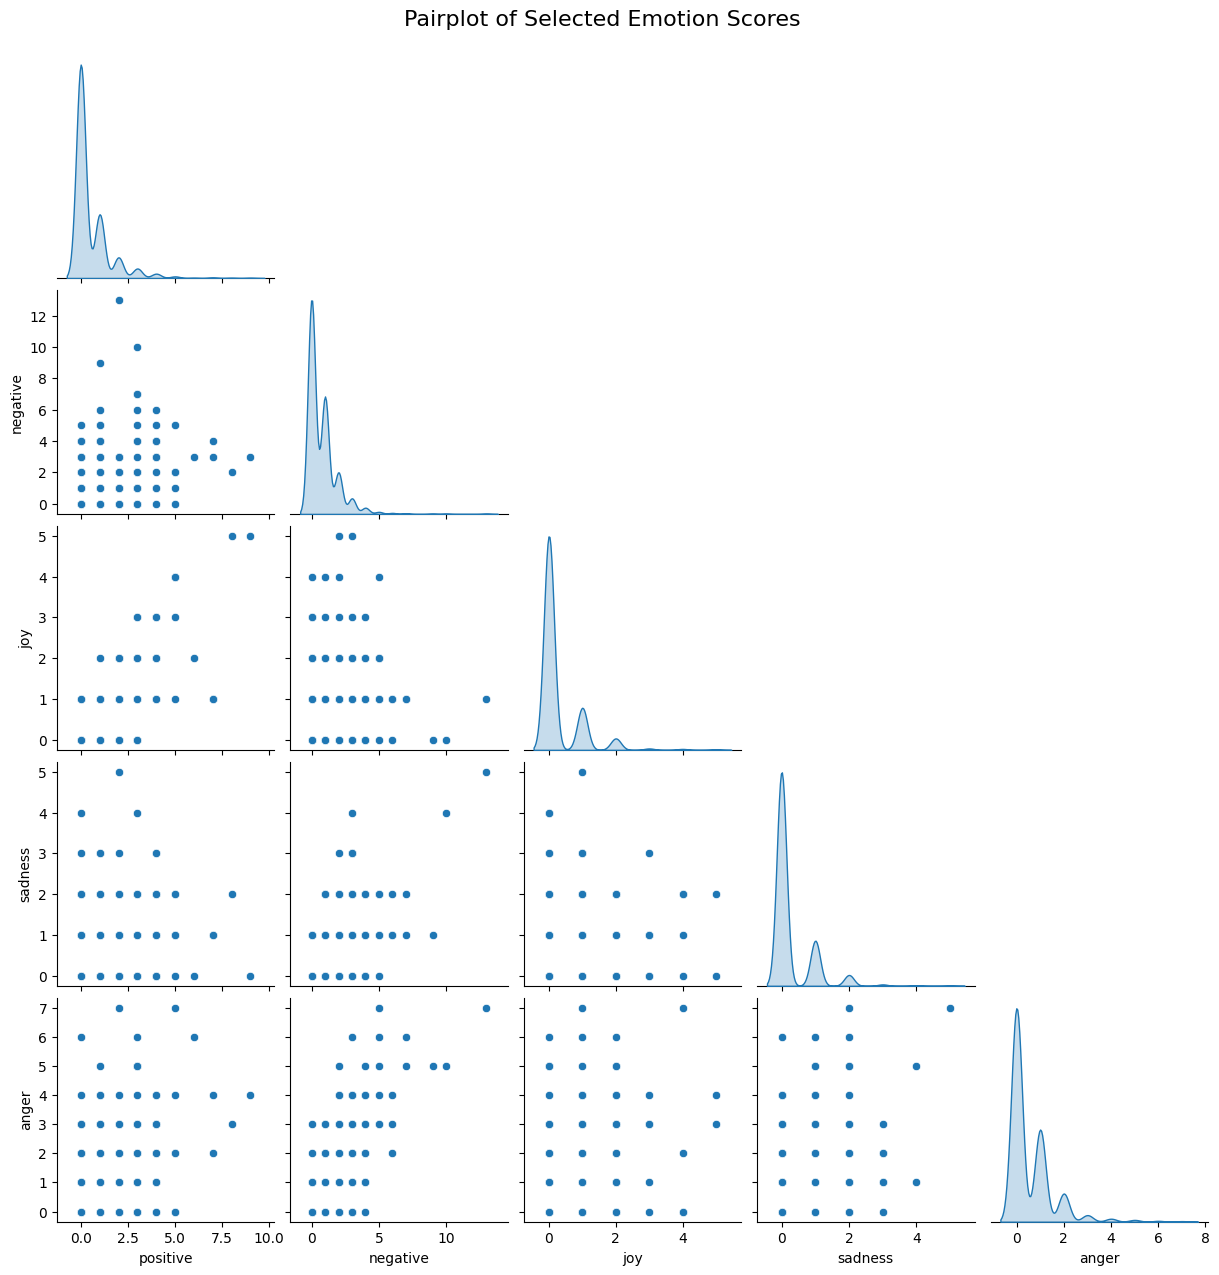

In [23]:
# Pairplot for selected emotion columns
selected_emotions = ['positive', 'negative', 'joy', 'sadness', 'anger']
sns.pairplot(df[selected_emotions], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Emotion Scores", y=1.02, fontsize=16)
plt.show()

### <a id='toc1_9_7_'></a>[Average likes by sentiment](#toc0_)


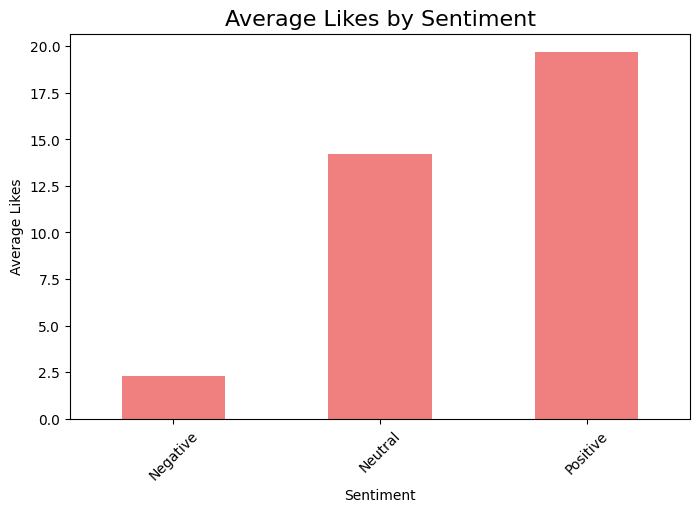

In [25]:
# Average likes by sentiment
avg_likes = df.groupby('sentiment')['like_count'].mean()
plt.figure(figsize=(8, 5))
avg_likes.plot(kind='bar', color='lightcoral')
plt.title("Average Likes by Sentiment", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

### <a id='toc1_9_8_'></a>[Top 5 Positive Emotion Comments](#toc0_)


In [27]:
pd.set_option('display.max_colwidth', None)

# Comments with highest positive emotion scores
top_positive_comments = df.sort_values(by='positive', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'positive']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        comment  \
57                                                        I think you past your prime and are foolish enough to think the internet cares about your extremist mindset on a boxing match forgetting that the entertainment world is all about entertainment and engagement. You do the engaging and we will watch it for the entertainment . Tysons a full grown man who makes his own

### <a id='toc1_9_9_'></a>[Top 5 Negative Emotion Comments](#toc0_)


In [29]:
top_positive_comments = df.sort_values(by='negative', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'negative']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comment  \
280  Mr Tyson  no disrespect bro , please , PLEASE withdraw from this fight with the young hungry heavyweight prospect & future Undisputed World Champion ,"The 1:24  Problem Child" Jake Paul (10-1- 0  7 KO) ,  1st dan black belt Uechi Ryu Karate Do  🥋🇯🇵  .\n\nOnce again Mr Tyson , please PLEASE withdraw from this dangerous fight as you will be hurt & we fear for your health & safety .\n\n\nFriend of Grandmaster Steven Segal Sensei : 11th dan black belt 🥋 